In [1]:
import sys
sys.path.append('/home/wangs/rs/lib')
import ff
import pickle
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("whitegrid")
sns.set_palette("pastel")
from multiprocessing import Pool
from tqdm import tqdm
import statsmodels.api as sm

In [4]:
factor_names1=['closer', 'openr', 'lowr', 'highr', 'ocret', 'lcret', 'hcret', 'ohret', 'ret5', 'ret10', 'ret20', 'ret30', 'excess5', 'excess10', 'excess20', 'excess30', 'ma5', 'bias5', 'ma10',
           'bias10', 'ma15', 'bias15', 'ma20', 'bias20', 'vwap_ret', 'vwaph_ret', 'll5', 'll15', 'll20', 'll30', 'a0', 'a5', 'a15', 'a30', 'ah5', 'ah10', 'ah15', 'std', 'amt_std', 'vol_std', 
           'amt_mean', 'vol_mean', 'turnover', 'turnover_mean', 'turnover_std', 'turnover_skew', 'turnoverf', 'turnoverf_mean', 'turnoverf_std', 'turnoverf_skew', 'mkv', 'l_mkv', 'lhret', 
           'STR', 'MTR', 'SMTR', 'ILLIQ','close','high','low']
factor_names2=['ARRP', 'ARRP_5d_20mean', 'AmpMod', 'BVol', 'CDPDVP', 'ILLIQ', 'IVoldeCorr', 'IntraDayMom20', 'MTR', 'RCP', 'SMTR', 'SPS', 'STR', 'a30', 
               'afternoon_ratio_1', 'ah15', 'amt', 'amt_ma20', 'amt_mean', 'amt_score0', 'amt_score1', 'amt_score2', 'amt_std', 'amt_std20', 'bias10', 'bias15', 'bias20', 'bias5', 
               'cross_std10', 'cross_std10adj', 'ctrade', 'excess10', 'excess20', 'excess30', 'excess5', 'growth_a', 'growth_b', 'growth_c', 'h_rankamt_corr_10', 'h_rankv_corr_10', 'h_rankv_corr_36', 
               'hcret', 'idiov', 'intro_high80_corr', 'ivr', 'l_mkv', 'mkv', 'mom1', 'mom_spring', 'nl_mkv', 'nl_mom', 'open0931ratio', 'open5ratio_ma10vol', 'rank_2_corr_hv10', 'rank_2_corr_hv20', 'rank_ha_corr_sum', 
               'ret20', 'ret30', 'ret5', 'roc121', 'roc20', 'roc240', 'roc5', 'scr', 'std', 'std20', 'std21', 'std240', 'stddev_cov', 'stddev_cov_right', 'sub', 'sysv', 'tail_ratio_1', 'tailrets0', 'tailrets1', 'tliq', 
               'turn20', 'turnover', 'turnover_mean', 'turnover_scale_z', 'turnover_score_ts_mean', 'turnover_score_ts_std', 'turnover_skew', 'turnover_std', 'turnoverf', 'turnoverf_mean', 'turnoverf_skew', 'turnoverf_std', 
               'up_KURS', 'up_plus_down_KURS', 'vol', 'vol_mean', 'vol_std', 'vol_std20', 'volroc_skew', '滞后日内量价corr']
factor_name3 =['accelerated_turnover_rank_RC','CSK_XYY_UP_DOWN_120D_RC','high_fre_vol_RC','high_fre_diff_vol_RC','high_fre_absdiff_vol_RC','peak_count_vol_RC','overnightsmart20_RC','CTR_RC','jumpCTR_RC','turnover_rate_proportion_l','synergy']
factor_name4 = ['ll60','ll120', 'lr5', 'lr10', 'lr20', 'lr30','lr60','lr120','posi60','posi120','posi240','nhigh20','nhigh60', 'nhigh120','nhigh20','nhigh60','nhigh120']
factor_name5 = ['rtn_condVaR', 'CTR_RC', 'jumpCTR_RC', 'openr', 'CCOIV', 'lr30', 'SZXZ', 'vol_DW', 'buy_sm_amount', 'lr20', 'TCV', 'ah10', 'buy_elg_amount', 'ret10', 'vol_LBQ', 'ah5', 'lr120', 'ma15', 'correlation_matrix13', 'high_fre_diff_vol', 'posi120', 'nlow60', 'roc30', 'accelerated_turnover_rank', 'VolStd', 'low', 'sell_sm_amount', 'vwap_ret', 'rtn_DW', 'high', 'sell_md_amount', 'll5', 'SBZL', 'lhret', 'nhigh120', 'SQ', 'draw30', 'lr60', 'SPR', 'close', 'rtn_LBQ', 'WBGM', 'closer', 'SCOV', 'll60', 'feph', 'ID_Vol_deCorr', 'highr', 'NCV', 'buy_md_amount', 'lcret', 'SCCOIV', 'VoPC', 'highStdRtn_meanN', 'lowr', 'up', 'nhigh20', 'll20', 'high_fre_vol', 'ma5', 'ZMCW', 'bias30', 'high_fre_absdiff_vol', 'a5', 'nlow120', 'UID', 'll15', 'sell_elg_amount', 'posi60', 'a0', 'ma20', 'roc60', 'correlation_matrix12', 'overnightsmart20_RC', 'peak_count_vol', 'roc15', 'lr10', 'VoWVR', 'rtn_rho', 'nhigh60', 'down', 'posi240', 'foc_Comb', 'vwaph_ret', 'vol_rho', 'GYCQ', 'draw60', 'up_limit', 'post', 'PCV', 'UTD10', 'RPV', 'buy_lg_amount', 'draw15', 'ocret', 'ma10', 'll30', 'rtn_foc', 'sell_lg_amount', 'vwap', 'YMSL', 'ohret', 'net_mf_amount', 'DW_Comb', 'market_mean_IV', 'CSK_XYY_UP_DOWN_120D', 'correlation_matrix11', 'down_limit', 'HYLJ', 'nlow20', 'bias60', 'SRV', 'LBQ_Comb', 'UTD20', 'open', 'a15', 'COYCYV', 'rho_Comb', 'll120', 'highStdRtn_mean', 'lr5', 'vol_foc']
Gpalpha_factor = ['Gpalpha001','Gpalpha002','Gpalpha003','Gpalpha004','Gpalpha005','Gpalpha006','Gpalpha007','Gpalpha008','Gpalpha009','Gpalpha010','Gpalpha011','Gpalpha012','Gpalpha013','Gpalpha014','Gpalpha015']
fields = factor_names1 + factor_names2 + factor_name3 + factor_name4 + factor_name5 + Gpalpha_factor
fields = list(set(fields))

In [41]:
Ret_result = pd.DataFrame(columns=('factor','level','年化收益率','夏普率','收益回撤比'))
rets = ff.rets_all.mean().loc['20200101':'20240101']
for i in tqdm(range(len(fields))):
# for factorname in fields[:-1]:
    try:
        factor = ff.read(fields[i]).loc[:,'20200101':'20240101']
        ts =  (factor * ff.filter0.loc[:,'20200101':'20240101']).mean()
        ts = pd.qcut(ts,5,labels=False)
        EH = ((ts == 4).replace({True:1,False:0}).shift(1) * rets).dropna()
        H = ((ts == 3).replace({True:1,False:0}).shift(1) * rets).dropna()
        M = ((ts == 2).replace({True:1,False:0}).shift(1) * rets).dropna()
        L = ((ts == 1).replace({True:1,False:0}).shift(1) * rets).dropna()
        EL = ((ts == 0).replace({True:1,False:0}).shift(1) * rets).dropna()
        Ret_result.loc[len(Ret_result)] = (fields[i],'5',ff.cal_returns(EH)['年化收益率'],ff.cal_returns(EH)['夏普率'],ff.cal_returns(EH)['收益回撤比'])
        Ret_result.loc[len(Ret_result)] = (fields[i],'4',ff.cal_returns(H)['年化收益率'],ff.cal_returns(H)['夏普率'],ff.cal_returns(H)['收益回撤比'])
        Ret_result.loc[len(Ret_result)] = (fields[i],'3',ff.cal_returns(M)['年化收益率'],ff.cal_returns(M)['夏普率'],ff.cal_returns(M)['收益回撤比'])
        Ret_result.loc[len(Ret_result)] = (fields[i],'2',ff.cal_returns(M)['年化收益率'],ff.cal_returns(L)['夏普率'],ff.cal_returns(L)['收益回撤比'])
        Ret_result.loc[len(Ret_result)] = (fields[i],'1',ff.cal_returns(H)['年化收益率'],ff.cal_returns(EL)['夏普率'],ff.cal_returns(EL)['收益回撤比'])
    except:
        pass

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 241/241 [03:37<00:00,  1.11it/s]


In [43]:
Ret_result.sort_values(by = '夏普率', ascending= False).head(5)

,factor,level,年化收益率,夏普率,收益回撤比
1155,ohret,5,0.190336,1.968499,2.369714
644,UID,1,0.014537,1.903479,2.819128
470,closer,5,0.156140,1.839276,3.122690
805,Gpalpha003,5,0.148368,1.773494,1.826244
909,h_rankv_corr_10,1,-0.041791,1.649664,2.196203


In [59]:
def retplot(factor,level):
    factor = ff.read(factor).loc[:,'20200101':'20240101']
    ts = (factor * ff.filter0.loc[:,'20200101':'20240101']).mean()
    ts = pd.qcut(ts,5,labels=False)
    rets = (ff.rets_all * ff.filter0.loc[:,'20200101':'20240101']).mean()
    ((ts == level).replace({True:1,False:0}).shift(1) * rets).dropna().cumsum().plot()

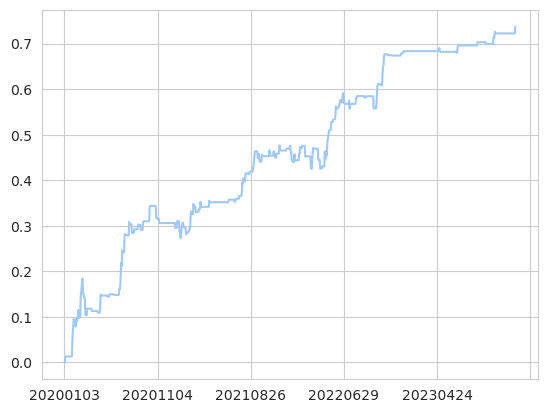

In [60]:
retplot('ohret',4)

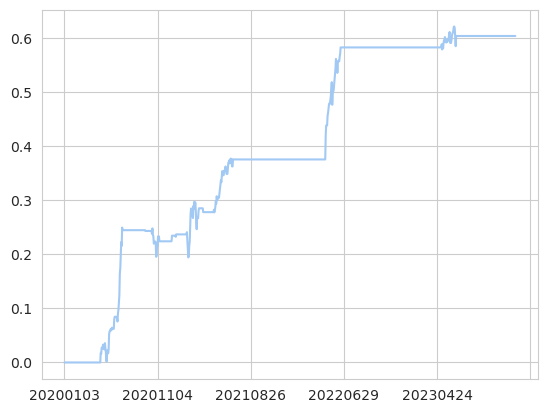

In [61]:
retplot('UID',0)

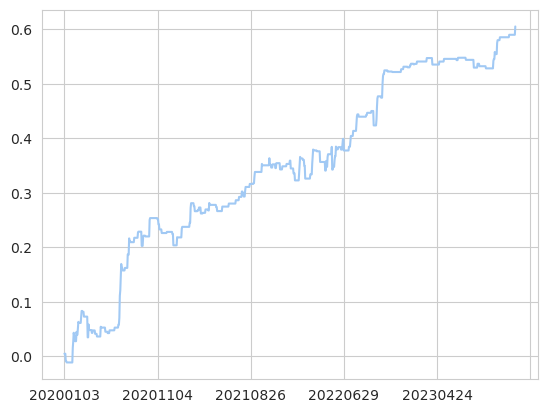

In [62]:
retplot('closer',4)

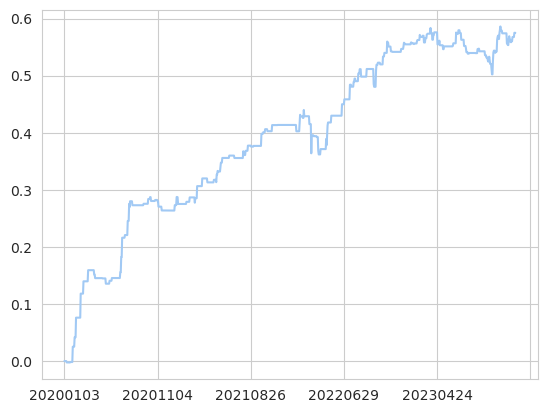

In [63]:
retplot('Gpalpha003',4)

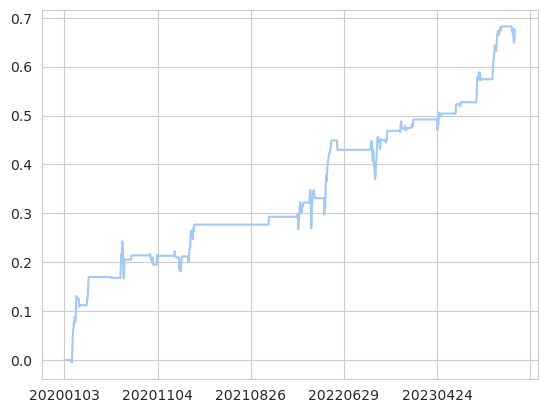

In [64]:
retplot('h_rankv_corr_10',0)

In [38]:
Ret_result[Ret_result['factor'].str.startswith('Gpalpha')].sort_values(by = '收益回撤比', ascending= False)

,factor,level,年化收益率,夏普率,收益回撤比
143,Gpalpha012,H,0.105129,0.949810,0.919135
485,Gpalpha003,H,0.131510,1.197221,0.915733
8,Gpalpha002,H,0.099940,0.864493,0.778921
201,Gpalpha005,L,0.120843,0.916342,0.711351
54,Gpalpha015,L,0.096165,0.838788,0.565379
585,Gpalpha011,L,0.081759,0.668166,0.554458
559,Gpalpha007,M,0.093176,0.904440,0.540909
90,Gpalpha004,L,0.091305,0.891218,0.535575
462,Gpalpha006,L,0.075471,0.651513,0.495837
518,Gpalpha013,H,0.073918,0.610918,0.444775


In [74]:
feature = pd.read_pickle('/home/wangs/data/check/all_status.pk')

In [125]:
feature

,PB,PE,std_type_raw,ILQ_type_raw,std_type,ILQ_type,high5_rate,high20_rate,high60_rate,high240_rate,...,amount120,amount240,amount_mean,up_rate,down_rate,continue_up,profit_5,profit_20,profit_120,profit_240
20100104,4.6437,65.10910,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20100105,4.6726,66.06920,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20100106,4.6587,66.12660,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20100107,4.6002,64.90385,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20100108,4.6019,66.01275,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20240123,2.1439,29.88140,1.0,1.0,1.0,1.0,0.020317,0.010362,0.003860,0.000813,...,0.258333,0.141667,1.036303,0.008939,0.005486,0.444444,0.062386,0.055861,0.087730,0.102456
20240124,2.1725,30.09260,1.0,1.0,1.0,1.0,0.068048,0.024172,0.010563,0.004469,...,0.516667,0.308333,0.995864,0.015235,0.000609,0.431818,0.243040,0.092910,0.099938,0.120748
20240125,2.2435,30.90850,1.0,1.0,1.0,1.0,0.252691,0.052610,0.022953,0.007109,...,0.866667,0.629167,1.021985,0.020719,0.000609,0.453333,0.909978,0.191039,0.143596,0.166457
20240126,2.2282,30.57505,1.0,1.0,1.0,1.0,0.247513,0.056447,0.024772,0.008528,...,0.758333,0.504167,1.000497,0.011980,0.001827,0.264706,0.833807,0.213442,0.152637,0.174990


In [112]:
Ret_result = pd.DataFrame(columns=('factor','level','年化收益率','夏普率','收益回撤比'))
rets = ff.rets_all.mean().loc['20200101':'20240101']
for factor in list(feature.columns):
    try:
        ts = feature[factor].loc['20200101':'20240101']
        ts = pd.qcut(ts,5,labels=False)
        EH = ((ts == 4).replace({True:1,False:0}).shift(1) * rets).dropna()
        H = ((ts == 3).replace({True:1,False:0}).shift(1) * rets).dropna()
        M = ((ts == 2).replace({True:1,False:0}).shift(1) * rets).dropna()
        L = ((ts == 1).replace({True:1,False:0}).shift(1) * rets).dropna()
        EL = ((ts == 0).replace({True:1,False:0}).shift(1) * rets).dropna()
        Ret_result.loc[len(Ret_result)] = (factor,'5',ff.cal_returns(EH)['年化收益率'],ff.cal_returns(EH)['夏普率'],ff.cal_returns(EH)['收益回撤比'])
        Ret_result.loc[len(Ret_result)] = (factor,'4',ff.cal_returns(H)['年化收益率'],ff.cal_returns(H)['夏普率'],ff.cal_returns(H)['收益回撤比'])
        Ret_result.loc[len(Ret_result)] = (factor,'3',ff.cal_returns(M)['年化收益率'],ff.cal_returns(M)['夏普率'],ff.cal_returns(M)['收益回撤比'])
        Ret_result.loc[len(Ret_result)] = (factor,'2',ff.cal_returns(M)['年化收益率'],ff.cal_returns(L)['夏普率'],ff.cal_returns(L)['收益回撤比'])
        Ret_result.loc[len(Ret_result)] = (factor,'1',ff.cal_returns(H)['年化收益率'],ff.cal_returns(EL)['夏普率'],ff.cal_returns(EL)['收益回撤比'])
    except:
        pass

In [113]:
Ret_result.sort_values(by = '夏普率', ascending= False).head(5)

,factor,level,年化收益率,夏普率,收益回撤比
34,low5_rate,1,-0.031075,1.922913,1.442101
135,profit_5,5,0.134573,1.642255,2.395667
89,percentile240_median,1,0.002274,1.585497,0.922836
154,profit_240,1,-0.032820,1.438111,0.834936
90,percentile240_skew,5,0.153887,1.397383,0.795339


In [111]:
Ret_result

,factor,level,年化收益率,夏普率,收益回撤比
0,high_fre_absdiff_vol,5,-0.052010,-0.602941,-0.227691
1,high_fre_absdiff_vol,4,0.031657,0.375150,0.189298
2,high_fre_absdiff_vol,3,0.019083,0.243362,0.177237
3,high_fre_absdiff_vol,2,0.019083,0.254220,0.197146
4,high_fre_absdiff_vol,1,0.031657,0.839011,0.637337
...,...,...,...,...,...
150,high_fre_absdiff_vol,5,-0.015642,-0.169196,-0.076920
151,high_fre_absdiff_vol,4,-0.032820,-0.400619,-0.181002
152,high_fre_absdiff_vol,3,-0.039652,-0.461180,-0.197211
153,high_fre_absdiff_vol,2,-0.039652,0.578478,0.419387


In [115]:
def retplot2(factor,level):
    ts = feature[factor].loc['20200101':'20240101']
    ts = pd.qcut(ts,5,labels=False)
    rets = (ff.rets_all * ff.filter0.loc[:,'20200101':'20240101']).mean()
    ((ts == level).replace({True:1,False:0}).shift(1) * rets).dropna().cumsum().plot()

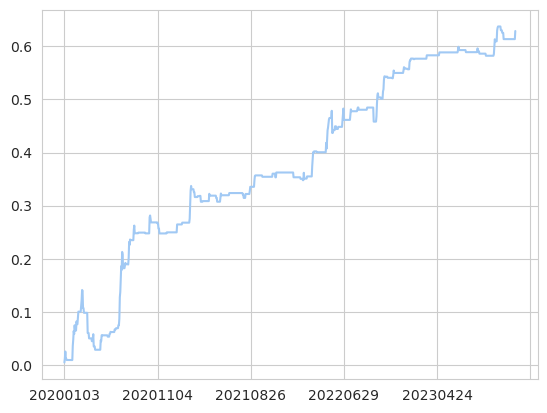

In [117]:
retplot2('low5_rate',0)

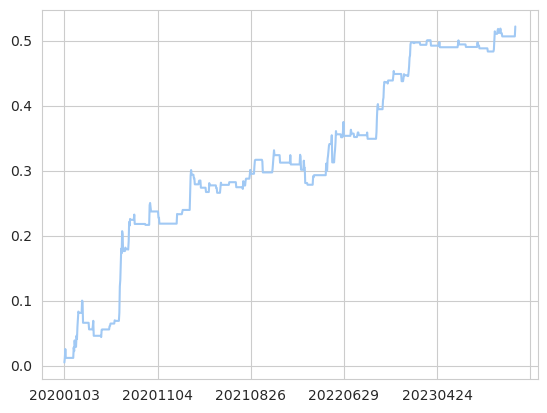

In [118]:
retplot2('profit_5',4)

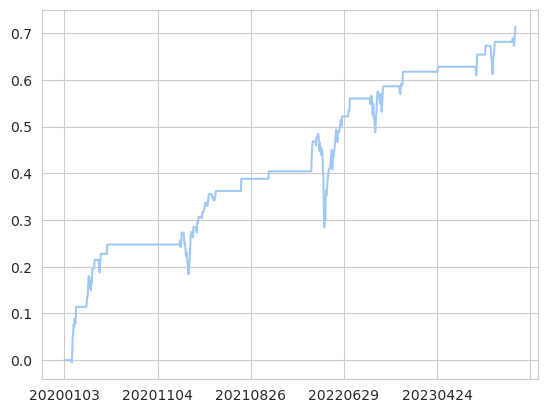

In [120]:
retplot2('percentile240_median',0)

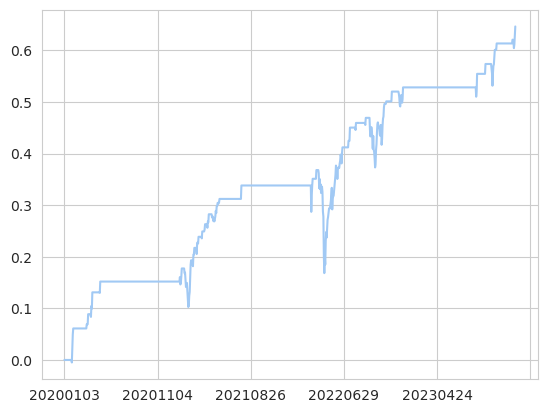

In [121]:
retplot2('profit_240',0)

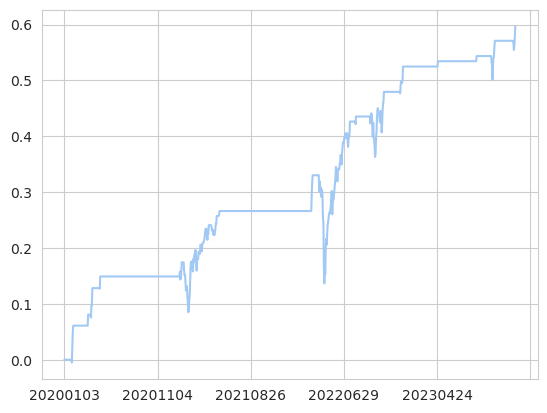

In [122]:
retplot2('percentile240_skew',4)